# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.io
import scipy.stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#import pingouin as pg
import seaborn as sns
from sklearn import svm

# Load Data

In [ ]:
mat = scipy.io.loadmat('sim1.mat') #'/content/drive/MyDrive/Colab Notebooks/sim1.mat')

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Nsubjects = mat['Nsubjects']
Ntimepoints = mat['Ntimepoints'][0,0]
Nnodes = mat['Nnodes'][0,0]
np_ts = mat['ts']
net = mat['net']

# Boxplots

Boxplot of C-sensitivity Values

In [ ]:
all_c_fullcorr = np.load('all_c_fullcorr.npy',allow_pickle='TRUE').item()
all_c_partcorr = np.load('all_c_partcorr.npy',allow_pickle='TRUE').item()
all_c_multiLin = np.load('all_c_multiLin.npy',allow_pickle='TRUE').item()
all_c_tree = np.load('all_c_tree.npy',allow_pickle='TRUE').item()
all_c_svm = np.load('all_c_svm.npy',allow_pickle='TRUE').item()
fig = plt.figure(figsize =(7, 8))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([all_c_fullcorr[50], all_c_partcorr[50], all_c_multiLin[50], all_c_tree[50], all_c_svm[50]],
                patch_artist = True, notch ='True')
ax.set_xticklabels(['Full Corr.', 'Partial Corr.', 'Mult. Lin. Reg.', 'Rand. Forest Reg.', 'SVM'], fontsize=12)
ax.set_ylim([0.5,1])
ax.set_ylabel('C-sensitivity', fontsize=12)
plt.title("Comparison of C-sensitivities", fontsize=14)
colors = ['#008080', '#58508d', '#bc5090', '#ff6361', '#ffa600']
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color)
for median in bp['medians']: 
    median.set(color ='black',
               linewidth = 3)
plt.savefig('hello2.png', dpi=700, bbox_inches='tight')

Boxplot of Sensitivity Values

In [ ]:
fullcor_sensi = np.load('fullcor_sensi.npy',allow_pickle='TRUE').item()
pc_sensi = np.load('pc_sensi.npy',allow_pickle='TRUE').item()
multiLin_sensi = np.load('multiLin_sensi.npy',allow_pickle='TRUE').item()
tree_sensi = np.load('tree_sensi.npy',allow_pickle='TRUE').item()
svm_sensi = np.load('svm_sensi.npy',allow_pickle='TRUE').item()
fig = plt.figure(figsize =(7, 8))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([fullcor_sensi[50], pc_sensi[50], multiLin_sensi[50], tree_sensi[50], svm_sensi[50]],
                patch_artist = True, notch ='True')
ax.set_xticklabels(['Full Corr.', 'Partial Corr.', 'Mult. Lin. Reg.', 'Rand. Forest Reg.', 'SVM'], fontsize=12)
ax.set_ylim([0.85,1])
ax.set_ylabel('Sensitivity', fontsize=12)
plt.title("Comparison of Sensitivities", fontsize=14)
colors = ['#008080', '#58508d', '#bc5090', '#ff6361', '#ffa600']
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
plt.savefig('hello.png', dpi=700, bbox_inches='tight')

Saving Dictionaries and Old Boxplots

In [ ]:
np.save('all_c_multiLin.npy', all_c_multiLin)
np.save('all_c_svm.npy', all_c_svm)
np.save('all_c_fullcorr.npy', all_c_fullcorr)
np.save('all_c_partcorr.npy', all_c_partcorr)
np.save('all_c_tree.npy', all_c_tree)

In [ ]:
import operator
from functools import reduce
print(np.average(reduce(operator.concat, list(all_c_tree.values()))))
print(np.average(reduce(operator.concat, list(all_c_svm.values()))))
print(np.average(reduce(operator.concat, list(all_c_fullcorr.values()))))
print(np.average(reduce(operator.concat, list(all_c_partcorr.values()))))
print(np.average(reduce(operator.concat, list(all_c_multiLin.values()))))

In [ ]:
import operator
from functools import reduce
print(np.average(all_c_multiLin[50]))
print(np.average(all_c_tree[50]))
print(np.average(all_c_svm[50]))
print(np.average(all_c_fullcorr[50]))
print(np.average(all_c_partcorr[50]))

In [ ]:
import operator
from functools import reduce

print(np.average(pc_sensi[5]))
print(np.average(pc_sensi[10]))
print(np.average(pc_sensi[50]))
print(np.average(reduce(operator.concat, list(pc_sensi.values()))))

In [ ]:
ax = sns.boxplot(np.array(list(all_c_tree.values())), color=".9", palette="Accent")
ax = sns.swarmplot(p.array(list(all_c_tree.values())), color=".7", palette="Set1", size=3)
plt.title("5 nodes")

In [ ]:
ax = sns.boxplot(all_c_multiLin[5], color=".9", palette="Accent")
#ax = sns.swarmplot(all_c_multiLin[5], color=".7", palette="Set1", size=1)
plt.title("5 nodes")

In [ ]:
ax = sns.boxplot(all_c_fullcorr[50], color=".9", palette="Accent")
ax = sns.swarmplot(all_c_fullcorr[50], color=".7", palette="Set1", size=3)
plt.title("50 nodes")

In [ ]:
ax = sns.boxplot(all_c_tree[50], color=".9", palette="Accent")
ax = sns.swarmplot(all_c_tree[50], color=".7", palette="Set1", size=3)
plt.title("50 nodes")

In [ ]:
ax = sns.boxplot(tree_list, color=".9", palette="Accent")
ax = sns.swarmplot(tree_list, color=".7", palette="Set1", size=3)
plt.title("all nodes")

In [ ]:
ax = sns.boxplot(all_c_tree, color=".9", palette="Accent")
ax = sns.swarmplot(all_c_tree, color=".7", palette="Set1")

In [ ]:
ax = sns.boxplot(all_c_svm, color=".9", palette="Accent")
ax = sns.swarmplot(all_c_svm, color=".7", palette="Set1")

In [ ]:
mat = scipy.io.loadmat('sim' + '4' + '.mat')
net = mat['net']
net.shape

# Algorithms and Sensitivity

Calculate Sensitivity

In [ ]:
def calc_sensitivity(model, actual, Nnodes):
  tp = 0
  fn = 0
  for i in range(Nnodes):
    for j in range(i+1,Nnodes):
      #print(i, j)
      if model[i][j] > 0 and actual[i][j] > 0:
        tp += 1
      if model[i][j] <= 0 and actual[i][j] > 0:
        fn += 1
  return tp/(tp+fn)

SVM

In [ ]:
svm_sensi = {5: [], 10: [], 15: [], 50: []}
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  net = mat['net']
  for pers in range(Nsubjects):
    model = svm_adjMat[i-1,:][pers]
    c_sens = calc_sensitivity(model, net[pers,:,:], Nnodes)
# end: average all c-sens'
    svm_sensi[Nnodes].append(c_sens)

Partial Correlation

In [ ]:
pc_sensi = {5: [], 10: [], 15: [], 50: []}
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  net = mat['net']
  for pers in range(Nsubjects):
    model = parCor_adjMat[i-1,:][pers]
    c_sens = calc_sensitivity(model, net[pers,:,:], Nnodes)
# end: average all c-sens'
    pc_sensi[Nnodes].append(c_sens)

Random Forest

In [ ]:
tree_sensi = {5: [], 10: [], 15: [], 50: []}
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  net = mat['net']
  for pers in range(Nsubjects):
    model = tree_adjMat[i-1,:][pers]
    c_sens = calc_sensitivity(model, net[pers,:,:], Nnodes)
# end: average all c-sens'
    tree_sensi[Nnodes].append(c_sens)

Full Correlation

In [ ]:
fullcor_sensi = {5: [], 10: [], 15: [], 50: []}
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  net = mat['net']
  for pers in range(Nsubjects):
    model = fullCor_adjMat[i-1,:][pers]
    c_sens = calc_sensitivity(model, net[pers,:,:], Nnodes)
# end: average all c-sens'
    fullcor_sensi[Nnodes].append(c_sens)

Multiple Linear Regression

In [ ]:
multiLin_sensi = {5: [], 10: [], 15: [], 50: []}
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  net = mat['net']
  for pers in range(Nsubjects):
    model = multiLin_adjMatrix[i-1,:][pers]
    c_sens = calc_sensitivity(model, net[pers,:,:], Nnodes)
# end: average all c-sens'
    multiLin_sensi[Nnodes].append(c_sens)

# Algorithms and C-sensitivity

Calculate C-sensitivity

In [ ]:
def calc_c_sensitivity(model, actual):
  tp = []
  fp = []
  for i in range(Nnodes):
    for j in range(i+1,Nnodes):
      #if a positive
      if model[i][j] > 0: 
        #if true positive
        if actual[i][j] > 0:
          tp.append(model[i][j])
        #otherwise false positive
        else:
          fp.append(model[i][j])
  #print('tp', tp)
  #print('fp', fp)
  if len(fp) == 0:
    return 1.0
  elif len(tp) == 0:
    return 0.0
  else:
    fp95 = np.percentile(np.array(fp), 95)
    #print('fp 95th percentile: ', fp95)
    tp_np = np.array(tp)
    return len(tp_np[tp_np > fp95])/len(tp)

Multiple Linear Regression

In [ ]:
all_c_multiLin = {5: [], 10: [], 15: [], 50: []}
multiLin_importMatrix = []
multiLin_adjMatrix = []
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Ntimepoints = mat['Ntimepoints'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  np_ts = mat['ts']
  net = mat['net']
# calc extremely randomized trees, c-sens
  temp_one_sim_impMat = []
  temp_one_sim_adjMat = []
  for pers in range(Nsubjects):
    res = calc_importance_matrix_MultipleLinReg(pers, Ntimepoints, Nnodes, np_ts, net)
    model = avg_and_calc_threshold(res.copy(), Nnodes)
    temp_one_sim_impMat.append(res)
    temp_one_sim_adjMat.append(model)
    c_sens = calc_c_sensitivity(model, net[pers,:,:])
# end: average all c-sens'
    all_c_multiLin[Nnodes].append(c_sens)
  multiLin_importMatrix.append(temp_one_sim_impMat)
  multiLin_adjMatrix.append(temp_one_sim_adjMat)
#print(np.average(np.array(all_c_multiLin)))

Random Forest Regression

In [ ]:
all_c_tree = {5: [], 10: [], 15: [], 50: []}
tree_impMat = []
tree_adjMat = []
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Ntimepoints = mat['Ntimepoints'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  np_ts = mat['ts']
  net = mat['net']
# calc extremely randomized trees, c-sens
  temp_one_sim_impMat = []
  temp_one_sim_adjMat = []
  for pers in range(Nsubjects):
    res = calc_importance_matrix_ExRandTrees(pers, Ntimepoints, Nnodes, np_ts, net)
    model = avg_and_calc_threshold(res.copy(), Nnodes)
    temp_one_sim_impMat.append(res)
    temp_one_sim_adjMat.append(model)
    c_sens = calc_c_sensitivity(model, net[pers,:,:])
# end: average all c-sens'
    all_c_tree[Nnodes].append(c_sens)
  tree_impMat.append(temp_one_sim_impMat)
  tree_adjMat.append(temp_one_sim_adjMat)

SVM

In [ ]:
all_c_svm = {5: [], 10: [], 15: [], 50: []}
svm_impMat = []
svm_adjMat = []
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Ntimepoints = mat['Ntimepoints'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  np_ts = mat['ts']
  net = mat['net']
  temp_one_sim_impMat = []
  temp_one_sim_adjMat = []
# calc extremely randomized trees, c-sens
  for pers in range(Nsubjects):
    res = calc_importance_matrix_SVM(pers, Ntimepoints, Nnodes, np_ts, net)
    model = avg_and_calc_threshold(res, Nnodes)
    temp_one_sim_impMat.append(res.copy())
    temp_one_sim_adjMat.append(model)
    c_sens = calc_c_sensitivity(model, net[pers,:,:])
# end: average all c-sens'
    all_c_svm[Nnodes].append(c_sens)
#print(np.average(np.array(all_c_multiLin)))
  svm_impMat.append(temp_one_sim_impMat)
  svm_adjMat.append(temp_one_sim_adjMat)
np.save("svm_impMat", np.array(svm_impMat))
np.save("svm_adjMat", np.array(svm_adjMat))

Full Correlation

In [ ]:
all_c_fullcorr = {5: [], 10: [], 15: [], 50: []}
fullCor_impMat = []
fullCor_adjMat = []
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Ntimepoints = mat['Ntimepoints'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  np_ts = mat['ts']
  net = mat['net']
  temp_one_sim_impMat = []
  temp_one_sim_adjMat = []
# calc extremely randomized trees, c-sens
  for pers in range(Nsubjects):
    person_i = np_ts[pers*Ntimepoints:(pers+1)*Ntimepoints,:]
    X = np.corrcoef(person_i.T)
    model = avg_and_calc_threshold(X.copy(), Nnodes)
    temp_one_sim_impMat.append(X)
    temp_one_sim_adjMat.append(model)
    c_sens = calc_c_sensitivity(model, net[0,:,:])
    all_c_fullcorr[Nnodes].append(c_sens)
  fullCor_impMat.append(temp_one_sim_impMat)
  fullCor_adjMat.append(temp_one_sim_adjMat)
np.save('fullCor_adjMat2', np.array(fullCor_adjMat))
np.save('fullCor_impMat2',np.array(fullCor_impMat))

Partial Correlation

In [ ]:
all_c_partcorr = {5: [], 10: [], 15: [], 50: []}
parCor_impMat = []
parCor_adjMat = []
# for each simulation, for each person
for i in range(1,29):
  mat = scipy.io.loadmat('sim' + str(i) + '.mat')
  Nsubjects = mat['Nsubjects'][0,0]
  Ntimepoints = mat['Ntimepoints'][0,0]
  Nnodes = mat['Nnodes'][0,0]
  np_ts = mat['ts']
  net = mat['net']
  temp_one_sim_impMat = []
  temp_one_sim_adjMat = []
  for pers in range(Nsubjects):
    person_i = np_ts[pers*Ntimepoints:(pers+1)*Ntimepoints,:]
    par_cor = partial_corr(person_i)
    model = avg_and_calc_threshold(par_cor.copy(), Nnodes)
    temp_one_sim_impMat.append(par_cor)
    temp_one_sim_adjMat.append(model)
    c_sens = calc_c_sensitivity(model, net[pers,:,:])
    all_c_partcorr[Nnodes].append(c_sens)
  parCor_impMat.append(temp_one_sim_impMat)
  parCor_adjMat.append(temp_one_sim_adjMat)

# t-tests for Sensitivity

Load Data

In [ ]:
fullcor_sensi = np.load('fullcor_sensi.npy',allow_pickle='TRUE').item()
pc_sensi = np.load('pc_sensi.npy',allow_pickle='TRUE').item()
multiLin_sensi = np.load('multiLin_sensi.npy',allow_pickle='TRUE').item()
tree_sensi = np.load('tree_sensi.npy',allow_pickle='TRUE').item()
svm_sensi = np.load('svm_sensi.npy',allow_pickle='TRUE').item()

5 Nodes - Comparing Multiple Linear Regression with All

In [ ]:
scipy.stats.ttest_ind(multiLin_sensi[5], fullcor_sensi[5], axis=0, equal_var=True, nan_policy='propagate') # 9.15017335192263e-31
scipy.stats.ttest_ind(multiLin_sensi[5], pc_sensi[5], axis=0, equal_var=True, nan_policy='propagate') # 0.9186263063713618
scipy.stats.ttest_ind(multiLin_sensi[5], tree_sensi[5], axis=0, equal_var=True, nan_policy='propagate') # 9.611723298102455e-53
scipy.stats.ttest_ind(multiLin_sensi[5], svm_sensi[5], axis=0, equal_var=True, nan_policy='propagate') # 0.10983565652449914

10 Nodes - Comparing Multiple Linear Regression with All

In [ ]:
scipy.stats.ttest_ind(multiLin_sensi[10], fullcor_sensi[10], axis=0, equal_var=True, nan_policy='propagate') # 0.5063629638522109
scipy.stats.ttest_ind(multiLin_sensi[10], pc_sensi[10], axis=0, equal_var=True, nan_policy='propagate') # 0.8835971011553632
scipy.stats.ttest_ind(multiLin_sensi[10], tree_sensi[10], axis=0, equal_var=True, nan_policy='propagate') # 8.627565429406532e-19
scipy.stats.ttest_ind(multiLin_sensi[10], svm_sensi[10], axis=0, equal_var=True, nan_policy='propagate') # 0.23901561645457628

50 Nodes - Comparing Full Correlation with All

In [ ]:
scipy.stats.ttest_ind(fullcor_sensi[50], pc_sensi[50], axis=0, equal_var=True, nan_policy='propagate') # 1.7283692343281965e-05
scipy.stats.ttest_ind(fullcor_sensi[50], multiLin_sensi[50], axis=0, equal_var=True, nan_policy='propagate') # 1.7283692343281965e-05
scipy.stats.ttest_ind(fullcor_sensi[50], tree_sensi[50], axis=0, equal_var=True, nan_policy='propagate') # 6.016830620618742e-24
scipy.stats.ttest_ind(fullcor_sensi[50], svm_sensi[50], axis=0, equal_var=True, nan_policy='propagate') # 5.8768585857075884e-08

# t-tests for C-sensitivity

Load Data

In [ ]:
all_c_fullcorr = np.load('all_c_fullcorr.npy',allow_pickle='TRUE').item()
all_c_partcorr = np.load('all_c_partcorr.npy',allow_pickle='TRUE').item()
all_c_multiLin = np.load('all_c_multiLin.npy',allow_pickle='TRUE').item()
all_c_tree = np.load('all_c_tree.npy',allow_pickle='TRUE').item()
all_c_svm = np.load('all_c_svm.npy',allow_pickle='TRUE').item()

5 Nodes - Comparing Random Forests with All

In [ ]:
scipy.stats.ttest_ind(all_c_tree[5], all_c_fullcorr[5], axis=0, equal_var=True, nan_policy='propagate') # 5.186966107133436e-16
scipy.stats.ttest_ind(all_c_tree[5], all_c_partcorr[5], axis=0, equal_var=True, nan_policy='propagate') # 0.018954927677941033
scipy.stats.ttest_ind(all_c_tree[5], all_c_multiLin[5], axis=0, equal_var=True, nan_policy='propagate') # 0.0035793871095411212
scipy.stats.ttest_ind(all_c_tree[5], all_c_svm[5], axis=0, equal_var=True, nan_policy='propagate') # 0.0033322902957558646

10 Nodes - Comparing Random Forests with All

In [ ]:
scipy.stats.ttest_ind(all_c_tree[10], all_c_fullcorr[10], axis=0, equal_var=True, nan_policy='propagate') # 0.00041983993376560615
scipy.stats.ttest_ind(all_c_tree[10], all_c_partcorr[10], axis=0, equal_var=True, nan_policy='propagate') # 0.6809588780890732
scipy.stats.ttest_ind(all_c_tree[10], all_c_multiLin[10], axis=0, equal_var=True, nan_policy='propagate') # 0.6654466278810371
scipy.stats.ttest_ind(all_c_tree[10], all_c_svm[10], axis=0, equal_var=True, nan_policy='propagate') # 0.4578300853837173)

50 Nodes - Comparing Full Correlation with All

In [ ]:
scipy.stats.ttest_ind(all_c_fullcorr[50], all_c_partcorr[50], axis=0, equal_var=True, nan_policy='propagate') # 2.9317275160533637e-16
scipy.stats.ttest_ind(all_c_fullcorr[50], all_c_multiLin[50], axis=0, equal_var=True, nan_policy='propagate') # 1.0614455380534376e-16
scipy.stats.ttest_ind(all_c_fullcorr[50], all_c_tree[50], axis=0, equal_var=True, nan_policy='propagate') # 1.037667313556229e-09
scipy.stats.ttest_ind(all_c_fullcorr[50], all_c_svm[50], axis=0, equal_var=True, nan_policy='propagate') # 4.797258129903904e-27

# Calculating Importance Matrices

Averaging and Calculating Threshold

In [ ]:
def avg_and_calc_threshold(impMatrix, Nnodes):
  sum = 0
  count = 0
  for i in range(Nnodes):
    for j in range(i + 1, Nnodes):
      avg = (impMatrix[i][j] + impMatrix[j][i])/2
      impMatrix[i][j] = avg
      impMatrix[j][i] = avg
      sum += avg
      count += 1
  threshold = sum/count
  for k in range(Nnodes):
    for l in range(Nnodes):
      if impMatrix[k][l] < threshold or k == l:
        impMatrix[k][l] = 0
  return impMatrix

Calculating C-sensitivity

In [ ]:
def calc_c_sensitivity(model, actual):
  tp = []
  fp = []
  for i in range(Nnodes):
    for j in range(i+1,Nnodes):
      #if a positive
      if model[i][j] > 0: 
        #if true positive
        if actual[i][j] > 0:
          tp.append(model[i][j])
        #otherwise false positive
        else:
          fp.append(model[i][j])
  #print('tp', tp)
  #print('fp', fp)
  if len(fp) == 0:
    return 1.0
  elif len(tp) == 0:
    return 0.0
  else:
    fp95 = np.percentile(np.array(fp), 95)
    #print('fp 95th percentile: ', fp95)
    tp_np = np.array(tp)
    return len(tp_np[tp_np > fp95])/len(tp)

Multiple Linear Regression

In [ ]:
def calc_importance_matrix_MultipleLinReg(i, Ntimepoints,Nnodes, np_ts, net):
  res=[]
  #for i in range(Nsubjects):
  person_i = np_ts[i*Ntimepoints:(i+1)*Ntimepoints,:]
  for j in range(Nnodes):
    X = np.concatenate((person_i[:,:j],person_i[:,j+1:]), axis=1)
    Y=person_i[:,j]
    reg=linear_model.LinearRegression()
    reg.fit(X,Y)
    adjusted_row = np.concatenate((reg.coef_[:j], np.array([1.0]), reg.coef_[j:]))
    adjusted_row2 = np.resize(adjusted_row,(1,len(adjusted_row)))
    if j == 0:
      res = adjusted_row2
    else:
      res = np.append(res, adjusted_row2, axis=0)
  return res

In [ ]:
res = calc_importance_matrix_MultipleLinReg(9,Ntimepoints,Nnodes, np_ts, net)
print(res)

fig = plt.figure(figsize=(8,6))
plt.imshow(res, cmap='Blues')
plt.colorbar()
plt.title('Multiple Linear Regression: Person 1')
plt.show()
# add regularization term (Ridge + Lasso)
model = avg_and_calc_threshold(res, Nnodes)
print(model)
fig = plt.figure(figsize=(8,6))
plt.imshow(model, cmap='Blues')
plt.colorbar()
plt.title('Multiple Linear Regression: Person 1')
plt.show()
c_sens = calc_c_sensitivity(model, net[0,:,:])
print('c-sensitivity: ', c_sens)

Random Forest Regression

In [ ]:
def calc_importance_matrix_ExRandTrees(i, Ntimepoints,Nnodes, np_ts, net):
  res=[]
  #for i in range(Nsubjects):
  person_i = np_ts[i*Ntimepoints:(i+1)*Ntimepoints,:]
  for j in range(Nnodes):
    X = np.concatenate((person_i[:,:j],person_i[:,j+1:]), axis=1)
    Y=person_i[:,j]
    regr = RandomForestRegressor(max_depth=5, random_state=0) #future: maximize c-sens of test data (1/5 of data)
    regr.fit(X, Y)
    adjusted_row = np.concatenate((regr.feature_importances_[:j], np.array([1.0]), regr.feature_importances_[j:]))
    adjusted_row2 = np.resize(adjusted_row,(1,len(adjusted_row)))
    if j == 0:
      res = adjusted_row2
    else:
      res = np.append(res, adjusted_row2, axis=0)
  return res

In [ ]:
res = calc_importance_matrix_ExRandTrees(0,Ntimepoints,Nnodes, np_ts, net)
print(res)

fig = plt.figure(figsize=(8,6))
plt.imshow(res, cmap='Blues')
plt.colorbar()
plt.title('Extremely Randomized Trees: Person 1')
plt.show()

model = avg_and_calc_threshold(res, Nnodes)
print(model)
c_sens = calc_c_sensitivity(model, net[0,:,:])
print('c-sensitivity: ', c_sens)

In [ ]:
res=[]
#for i in range(Nsubjects):
i=0
person_i = np_ts[i*Ntimepoints:(i+1)*Ntimepoints,:]
for j in range(Nnodes):
  X = np.concatenate((person_i[:,:j],person_i[:,j+1:]), axis=1)
  Y=person_i[:,j]
  regr = RandomForestRegressor(max_depth=2, random_state=0)
  regr.fit(X, Y)
  adjusted_row = np.concatenate((regr.feature_importances_[:j], np.array([1.0]), regr.feature_importances_[j:]))
  adjusted_row2 = np.resize(adjusted_row,(1,len(adjusted_row)))
  if j == 0:
    res = adjusted_row2
  else:
    res = np.append(res, adjusted_row2, axis=0)
print(res)

SVM

In [ ]:
def calc_importance_matrix_SVM(i, Ntimepoints,Nnodes, np_ts, net):
  res=[]
  #for i in range(Nsubjects):
  person_i = np_ts[i*Ntimepoints:(i+1)*Ntimepoints,:]
  for j in range(Nnodes):
    X = np.concatenate((person_i[:,:j],person_i[:,j+1:]), axis=1)
    Y=person_i[:,j]
    regr = svm.SVR(kernel='linear') #(kernel='rbf', C=10, gamma=0.1, epsilon=.1) #
    regr.fit(X,Y)
    #print('class weight', regr.class_weight_)
    #print('dual coef', regr.dual_coef_)
    #print('suport vectors:', regr.support_vectors_)
    adjusted_row = np.concatenate((regr.coef_[0,:j], np.array([1.0]), regr.coef_[0,j:]))
    adjusted_row2 = np.resize(adjusted_row,(1,len(adjusted_row)))
    if j == 0:
      res = adjusted_row2
    else:
      res = np.append(res, adjusted_row2, axis=0)
  return res

In [ ]:
res = calc_importance_matrix_SVM(0,Ntimepoints,Nnodes, np_ts, net)
print(res)

fig = plt.figure(figsize=(8,6))
plt.imshow(res, cmap='Blues')
plt.colorbar()
plt.title('SVM (Linear Kernel): Person 1') #should probs do rb
plt.show()

model = avg_and_calc_threshold(res, Nnodes)
print(model)
c_sens = calc_c_sensitivity(model, net[0,:,:])
print('c-sensitivity: ', c_sens)

Ground Truth

In [ ]:
print(net[0,:,:])

fig = plt.figure(figsize=(8,6))
plt.imshow(np.abs(net[0,:,:]), cmap='Blues')
plt.colorbar()
plt.title('Ground Truth: Person 1')
plt.show()

Full Correlation

[[1.         0.36255376 0.27639967 0.14800097 0.46128682]
 [0.36255376 1.         0.40028384 0.05610829 0.06839106]
 [0.27639967 0.40028384 1.         0.25942294 0.0564801 ]
 [0.14800097 0.05610829 0.25942294 1.         0.29711056]
 [0.46128682 0.06839106 0.0564801  0.29711056 1.        ]]


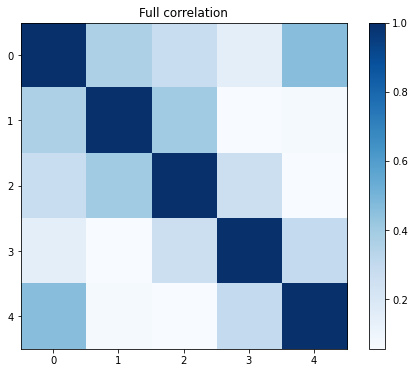

[[0.         0.36255376 0.27639967 0.         0.46128682]
 [0.36255376 0.         0.40028384 0.         0.        ]
 [0.27639967 0.40028384 0.         0.25942294 0.        ]
 [0.         0.         0.25942294 0.         0.29711056]
 [0.46128682 0.         0.         0.29711056 0.        ]]
c-sensitivity:  0.8


In [ ]:
i = 5
person_i = np_ts[i*Ntimepoints:(i+1)*Ntimepoints,:]
X = np.corrcoef(person_i.T)
print(X)

fig = plt.figure(figsize=(8,6))

plt.imshow(X, cmap='Blues')
plt.title("Full correlation")
plt.colorbar()
plt.show()

model = avg_and_calc_threshold(X, Nnodes)
print(model)
c_sens = calc_c_sensitivity(model, net[0,:,:])
print('c-sensitivity: ', c_sens)

Partial Correlation

In [ ]:
#from matlab bc python doesn't have a formal partial correlation for some reason...
# part_corr = np.array([[1.0000 ,   0.2749  ,  0.0119 ,  -0.1499   , 0.2409],
#     [0.2749  ,  1.0000  ,  0.2731 ,  -0.0366  , -0.0080],
#     [0.0119  ,  0.2731 ,   1.0000 ,   0.2319 ,  -0.0039],
#    [-0.1499  , -0.0366 ,   0.2319 ,   1.0000 ,   0.4574],
#     [0.2409  , -0.0080 ,  -0.0039 ,   0.4574 ,   1.0000]])
#part_corr = partial_corr(pd.DataFrame(person_i, columns = ['Column_A','Column_B','Column_C']))
fig = plt.figure(figsize=(8,6))
print(par_cor)

plt.imshow(par_cor, cmap='Blues')
plt.title("Partial correlation: Person 1")
plt.colorbar()
plt.show()
print(Nnodes)
model = avg_and_calc_threshold(par_cor, Nnodes)
print(model)
c_sens = calc_c_sensitivity(model, net[0,:,:])
print('c-sensitivity: ', c_sens)

In [ ]:
from scipy import stats, linalg

def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """

    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)

            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr

    return P_corr

#df = pd.DataFrame(person_i, columns = ['A']*Nnodes)
i=0
person_i = np_ts[i*Ntimepoints:(i+1)*Ntimepoints,:]
partial_corr_array = person_i#df.as_matrix()
print(person_i.shape)
# Calculate the partial correlation coefficients
par_cor = partial_corr(person_i)

(200, 5)


Symbolic Regression

In [ ]:
import gplearn as gpl        
from gplearn.genetic import SymbolicRegressor

# est_gp = SymbolicRegressor(population_size=5000,
#                            generations=20, stopping_criteria=0.01,
#                            p_crossover=0.7, p_subtree_mutation=0.1,
#                            p_hoist_mutation=0.05, p_point_mutation=0.1,
#                            max_samples=0.9, verbose=1,
#                            parsimony_coefficient=0.01, random_state=0)
est_gp = SymbolicRegressor(population_size = 3000, tournament_size=5,
                          generations = 25, stopping_criteria=0.1,
                          metric='rmse',
                          p_crossover=0.65, p_subtree_mutation=0.15,
                          p_hoist_mutation=0.05, p_point_mutation=0.1,
                          verbose = 1, random_state = None, n_jobs = -1)
j=0
X = np.concatenate((person_i[:,:j],person_i[:,j+1:]), axis=1)
Y=person_i[:,j]
est_gp.fit(X, Y)

In [ ]:
pip install gplearn

In [ ]:
print(est_gp._program)

In [ ]:
print(est_gp._program)

In [ ]:
!pip install gplearn

# Misc. Old Code

In [ ]:
df = pd.read_csv('sim1ts1.csv')
X = df[['node1', 'node2', 'node3', 'node4']]
Y = df['node5']

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(X,Y)
reg.coef_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, Y)
regr.feature_importances_

In [ ]:
df1 = [[1,0.14637418, 0.26985333, 0.17469013, 0.40908236], [0.44011094, 1,0.45310951, 0.0460363 , 0.06074326],[0.25951337, 0.46461836, 1,0.17412894, 0.10173934] ,[0.25519215, 0.12464035, 0.42438851, 1,0.19577899], [0.5659051 , 0.13064087, 0.100298  , 0.20315603,1]]

df2 = [[1,0.57563744, 0.1206875 , 0.03796405, 0.26571101], [0.04150232,1, 0.09852131, 0.74347962, 0.11649675], [0.19433478, 0.01544446,1, 0.37234976, 0.417871],[0.09241102, 0.11153479, 0.08491813,1, 0.71113606],[0.44112153, 0.06008876, 0.42584236, 0.07294735,0]]

df3  = [[1,0.59085846, 0.04374414, 0.292038  , 0.07335939],[0.25609297,1, 0.23415234, 0.42953435, 0.08022034],[0.34758726, 0.55602423,1, 0.07940353, 0.01698497],[0.07862085, 0.06403403, 0.16212624,1, 0.69521888],[0.40855464, 0.06356624, 0.40372305, 0.12415607,0]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array(df1)
X2=np.array(df2)
X3=np.array(df3)

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")
plt.show()

In [ ]:
df1_cc = np.corrcoef()